# 종합 디시젼트리 적용 후 라벨인코딩


In [102]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)

In [104]:
titanic_df=pd.read_csv('./data_sets/titanic_train.csv')  #csv파일 불러오기
warnings.filterwarnings('ignore') #경고문 무시하기

y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)


# X_titanic_df =transform_features(X_titanic_df)

In [105]:
# transform_features(X_titanic_df)
X_titanic_df
X_titanic_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [111]:
dt_clf=DecisionTreeClassifier(random_state=156)


In [109]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=156)

dt_clf.fit(X_train, y_train)



ValueError: could not convert string to float: 'Fleming, Miss. Margaret'

In [ ]:
dt_clf.feature_importances_


array([0.08926534, 0.28371894, 0.25750097, 0.04487738, 0.02337126,
       0.2325087 , 0.04908805, 0.01966936])

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
#feature importance 추출
print("Feature importances:\n {0}".format(np.round(dt_clf.feature_importances_,5)))

Feature importances:
 [0.08927 0.28372 0.2575  0.04488 0.02337 0.23251 0.04909 0.01967]


<AxesSubplot:>

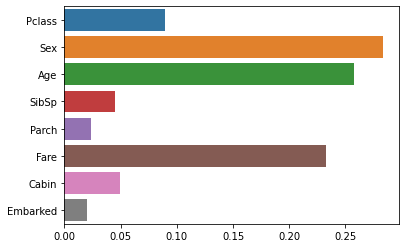

In [ ]:
#feature importance를 column 별로 시각화 하기
#feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_,y=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'])

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="homework.dot",class_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'],
                feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'].feature_names,impurity=True,filled=True)